In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque, Counter
import random
import time
from matplotlib.animation import FuncAnimation
import seaborn as sns
from matplotlib import rc
rc('animation', html='jshtml')

In [3]:
class ConsciousnessSimulator:
    """
    Consciousness simulator based on Buddhist theory of dharmas.
    Models streams of consciousness, interaction with the external world, and self-awareness processes.
    """

    def __init__(self):
        # Basic symbols-dharmas and their semantics
        self.primary_dharmas = {
            'v': 'vedanā (sensation/feeling)',
            's': 'saññā (perception/recognition)',
            'c': 'cetanā (intention/volition)',
            'p': 'phassa (contact)',
            'm': 'manasikāra (attention)',
            'a': 'anicca (impermanence)',
            'd': 'dukkha (unsatisfactoriness)',
            'n': 'anattā (selflessness)'
        }

        # Opposites of basic dharmas
        self.opposite_dharmas = {
            char: f"{char}'" for char in self.primary_dharmas.keys()
        }
        self.opposite_dharmas.update({f"{char}'": char for char in self.primary_dharmas.keys()})

        # Secondary symbols (composite dharmas)
        self.secondary_dharmas = {
            'j': 'jñāna (knowledge/understanding)',
            'k': 'karma (action)',
            'b': 'buddhi (awakening)',
            'u': 'upekkhā (equanimity)',
            'l': 'lobha (attachment)',
            'h': 'hiri (conscience)'
        }

        # Streams of consciousness
        self.consciousness_stream = deque(maxlen=100)  # Main stream of consciousness
        self.mindfulness_stream = deque(maxlen=50)     # Stream of awareness/self-observation
        self.subconscious_stream = deque(maxlen=200)   # Subconscious stream

        # External influences and stimuli
        self.external_stimuli = []

        # Semantic network of connections between dharmas
        self.dharma_network = nx.DiGraph()
        self._initialize_dharma_network()

        # States of consciousness
        self.attention_level = 0.5  # Level of attention (0-1)
        self.mindfulness_level = 0.3  # Level of mindfulness (0-1)
        self.emotional_state = 0.0  # From -1 (negative) to 1 (positive)

        # State history for tracking
        self.state_history = {
            'attention': [],
            'mindfulness': [],
            'emotional': [],
            'consciousness_composition': []
        }

        # Current simulation step
        self.current_step = 0

    def _initialize_dharma_network(self):
        """Initializes the semantic network of connections between dharmas"""
        # Add all basic dharmas as nodes
        for char, meaning in self.primary_dharmas.items():
            self.dharma_network.add_node(char, type='primary', meaning=meaning)
            opposite = f"{char}'"
            self.dharma_network.add_node(opposite, type='opposite', meaning=f"opposite of {meaning}")

            # Connection between opposites
            self.dharma_network.add_edge(char, opposite, type='opposite')
            self.dharma_network.add_edge(opposite, char, type='opposite')

        # Add secondary dharmas
        for char, meaning in self.secondary_dharmas.items():
            self.dharma_network.add_node(char, type='secondary', meaning=meaning)

        # Establish relationships between dharmas
        self._establish_dharma_relationships()

    def _establish_dharma_relationships(self):
        """Establishes semantic connections between different dharmas"""
        # Perception (s) depends on contact (p) and attention (m)
        self.dharma_network.add_edge('p', 's', weight=0.7, type='causal')
        self.dharma_network.add_edge('m', 's', weight=0.8, type='causal')

        # Sensation (v) arises based on perception (s)
        self.dharma_network.add_edge('s', 'v', weight=0.6, type='causal')

        # Intention (c) is formed based on sensation (v) and perception (s)
        self.dharma_network.add_edge('v', 'c', weight=0.5, type='causal')
        self.dharma_network.add_edge('s', 'c', weight=0.4, type='causal')

        # Knowledge (j) is formed from perception (s) and attention (m)
        self.dharma_network.add_edge('s', 'j', weight=0.7, type='composition')
        self.dharma_network.add_edge('m', 'j', weight=0.6, type='composition')

        # Action (k) depends on intention (c)
        self.dharma_network.add_edge('c', 'k', weight=0.9, type='causal')

        # Awareness of impermanence (a) through perception (s) of changes
        self.dharma_network.add_edge('s', 'a', weight=0.4, type='realization')

        # Unsatisfactoriness (d) is related to attachment (l)
        self.dharma_network.add_edge('l', 'd', weight=0.8, type='causal')

        # Selflessness (n) is realized through understanding (j)
        self.dharma_network.add_edge('j', 'n', weight=0.5, type='realization')

        # Equanimity (u) is the result of understanding (j) and selflessness (n)
        self.dharma_network.add_edge('j', 'u', weight=0.6, type='development')
        self.dharma_network.add_edge('n', 'u', weight=0.7, type='development')

        # Awakening (b) is the result of awareness of the three characteristics (a, d, n)
        self.dharma_network.add_edge('a', 'b', weight=0.7, type='development')
        self.dharma_network.add_edge('d', 'b', weight=0.7, type='development')
        self.dharma_network.add_edge('n', 'b', weight=0.7, type='development')

    def perceive_external_stimulus(self, stimulus_type, intensity=0.5):
        """
        Processes an external stimulus, activating the corresponding dharmas

        Args:
            stimulus_type: type of stimulus ('visual', 'auditory', 'tactile', etc.)
            intensity: stimulus intensity (0-1)
        """
        # First, contact (p) is activated
        self.consciousness_stream.append('p')

        # Then attention (m) depending on the intensity and current level of attention
        if random.random() < (intensity * self.attention_level):
            self.consciousness_stream.append('m')

            # Next, perception (s) arises
            self.consciousness_stream.append('s')

            # Sensation (v) arises - positive or negative
            if random.random() < 0.5 + (self.emotional_state * 0.3):
                self.consciousness_stream.append('v')  # Pleasant sensation
            else:
                self.consciousness_stream.append("v'")  # Unpleasant sensation

            # Intention (c) may arise depending on the emotional coloring
            if 'v' in self.get_recent_dharmas(3) and random.random() < 0.7:
                self.consciousness_stream.append('c')
            elif "v'" in self.get_recent_dharmas(3) and random.random() < 0.6:
                self.consciousness_stream.append("c'")
        else:
            # If attention is insufficient, perception is weakened
            self.consciousness_stream.append("m'")
            self.consciousness_stream.append("s'")

        # Add the stimulus to the list of external influences
        self.external_stimuli.append({
            'type': stimulus_type,
            'intensity': intensity,
            'time': self.current_step
        })

        # Update states
        self._update_state_after_stimulus(intensity)

    def _update_state_after_stimulus(self, intensity):
        """Updates the internal state after a stimulus"""
        # The stimulus can increase or decrease attention
        attention_change = (intensity - 0.5) * 0.1
        self.attention_level = max(0, min(1, self.attention_level + attention_change))

        # Emotional state may change
        if 'v' in self.get_recent_dharmas(5):
            self.emotional_state += 0.05 * intensity
        elif "v'" in self.get_recent_dharmas(5):
            self.emotional_state -= 0.05 * intensity

        # Limit the emotional state
        self.emotional_state = max(-1, min(1, self.emotional_state))

    def get_recent_dharmas(self, n=5):
        """Returns the last n dharmas from the stream of consciousness"""
        return list(self.consciousness_stream)[-n:] if self.consciousness_stream else []

    def introspect(self):
        """
        Self-observation/introspection process
        Activates the stream of mindfulness and derivative dharmas
        """
        # Self-observation depends on the level of mindfulness
        if random.random() < self.mindfulness_level:
            # Copy the last dharmas from the stream of consciousness to the stream of mindfulness
            recent_dharmas = self.get_recent_dharmas(5)
            for dharma in recent_dharmas:
                self.mindfulness_stream.append(dharma)

            # The process of awareness can activate derivative dharmas
            if 's' in recent_dharmas and 'm' in recent_dharmas:
                self.mindfulness_stream.append('j')  # Understanding arises

            if 'v' in recent_dharmas and 'a' in recent_dharmas:
                # Awareness of the impermanence of sensations
                self.mindfulness_stream.append('a')

                # Awareness of selflessness may arise
                if random.random() < 0.3:
                    self.mindfulness_stream.append('n')

            # The level of mindfulness increases
            self.mindfulness_level = min(1.0, self.mindfulness_level + 0.02)

            # Return introspection results to the main stream
            return self.mindfulness_stream
        else:
            # Awareness does not occur
            return []

    def generate_thought(self):
        """
        Generates an internal thought, activating the corresponding dharmas
        without external stimuli
        """
        # Select the initial dharma based on the current state
        if self.emotional_state > 0.3:
            initial_dharma = random.choice(['v', 'c', 'm'])
        elif self.emotional_state < -0.3:
            initial_dharma = random.choice(["v'", "c'", 'd'])
        else:
            initial_dharma = random.choice(list(self.primary_dharmas.keys()))

        # Add the initial dharma to the stream of consciousness
        self.consciousness_stream.append(initial_dharma)

        # Generate a chain of related dharmas based on the semantic network
        self._generate_dharma_chain(initial_dharma, length=3)

        # There is a probability of introspection activation
        if random.random() < self.mindfulness_level:
            self.introspect()

    def _generate_dharma_chain(self, start_dharma, length=3):
        """Generates a chain of related dharmas based on the relationship network"""
        current_dharma = start_dharma

        for _ in range(length):
            # Get possible next dharmas based on the network
            if current_dharma in self.dharma_network:
                neighbors = list(self.dharma_network.neighbors(current_dharma))
                if neighbors:
                    # Select the next dharma taking into account the weights of the connections
                    weights = [self.dharma_network[current_dharma][next_dharma].get('weight', 0.5)
                            for next_dharma in neighbors]
                    next_dharma = random.choices(neighbors, weights=weights, k=1)[0]

                    # Add to the stream of consciousness
                    self.consciousness_stream.append(next_dharma)
                    current_dharma = next_dharma
                else:
                    break
            else:
                break

    def process_subconscious(self):
        """
        Processes subconscious processes that may influence
        the main stream of consciousness
        """
        # Move some elements from the main stream to the subconscious
        if len(self.consciousness_stream) > 10 and random.random() < 0.3:
            # Take a random dharma from not the very last ones
            old_dharmas = list(self.consciousness_stream)[:-5]
            if old_dharmas:
                dharma_to_subconscious = random.choice(old_dharmas)
                self.subconscious_stream.append(dharma_to_subconscious)

        # The subconscious may influence the main stream
        if len(self.subconscious_stream) > 20 and random.random() < 0.2:
            # A random dharma from the subconscious may surface
            dharma_from_subconscious = random.choice(list(self.subconscious_stream))
            self.consciousness_stream.append(dharma_from_subconscious)

            # This may activate introspection
            if random.random() < self.mindfulness_level * 1.5:
                self.introspect()

    def update_state_tracking(self):
        """Updates state history for tracking"""
        self.state_history['attention'].append(self.attention_level)
        self.state_history['mindfulness'].append(self.mindfulness_level)
        self.state_history['emotional'].append(self.emotional_state)

        # Count the composition of the current consciousness
        composition = Counter(self.get_recent_dharmas(10))
        normalized_comp = {k: v/10 for k, v in composition.items()}
        self.state_history['consciousness_composition'].append(normalized_comp)

    def simulate_step(self, external_input=None):
        """
        Performs one simulation step

        Args:
            external_input: optional external stimulus
        """
        # Process external input, if any
        if external_input:
            stim_type, intensity = external_input
            self.perceive_external_stimulus(stim_type, intensity)

        # Generate internal thought with some probability
        if random.random() < 0.3:
            self.generate_thought()

        # Process subconscious processes
        self.process_subconscious()

        # Periodically activate introspection
        if random.random() < 0.2:
            self.introspect()

        # Update state tracking
        self.update_state_tracking()

        # Increment step counter
        self.current_step += 1

        # Attention may dissipate over time without stimulation
        if not external_input and self.attention_level > 0.2:
            self.attention_level -= 0.01

        # Mindfulness may also weaken without practice
        if not self.get_recent_dharmas(3) and self.mindfulness_level > 0.1:
            self.mindfulness_level -= 0.005

    def get_current_state_description(self):
        """Returns a textual description of the current state of consciousness"""
        recent_dharmas = self.get_recent_dharmas(7)
        dharma_meanings = [
            f"{d}: {self.primary_dharmas.get(d, self.secondary_dharmas.get(d, 'opposite'))}"
            for d in recent_dharmas
        ]

        description = [
            f"Current state of consciousness (step {self.current_step}):",
            f"Attention level: {self.attention_level:.2f}",
            f"Mindfulness level: {self.mindfulness_level:.2f}",
            f"Emotional state: {self.emotional_state:.2f}",
            f"Current stream of consciousness: {''.join(recent_dharmas)}",
            "Active dharmas:",
            *dharma_meanings
        ]

        return "\n".join(description)

    def visualize_consciousness_state(self):
        """Visualizes the current state of consciousness streams"""
        plt.figure(figsize=(15, 10))

        # Graph of attention and mindfulness levels
        plt.subplot(2, 2, 1)
        x = list(range(len(self.state_history['attention'])))
        plt.plot(x, self.state_history['attention'], label='Attention')
        plt.plot(x, self.state_history['mindfulness'], label='Mindfulness')
        plt.plot(x, self.state_history['emotional'], label='Emotional State')
        plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        plt.title('Dynamics of Consciousness States')
        plt.xlabel('Simulation Steps')
        plt.ylabel('Level')
        plt.legend()

        # Stream of consciousness as a network
        plt.subplot(2, 2, 2)
        recent_dharmas = self.get_recent_dharmas(12)
        if recent_dharmas:
            G = nx.DiGraph()
            # Add nodes and edges for the sequence of dharmas
            for i in range(len(recent_dharmas)-1):
                G.add_edge(recent_dharmas[i], recent_dharmas[i+1])

            # Visualize
            pos = nx.spring_layout(G)
            nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
            nx.draw_networkx_edges(G, pos, width=2, arrowsize=20)
            nx.draw_networkx_labels(G, pos, font_size=14)
            plt.title('Current Stream of Consciousness')
            plt.axis('off')

        # Chart of the composition of the last state of consciousness
        plt.subplot(2, 2, 3)
        if self.state_history['consciousness_composition']:
            latest_comp = self.state_history['consciousness_composition'][-1]
            if latest_comp:
                labels = latest_comp.keys()
                values = latest_comp.values()
                plt.bar(labels, values, color=sns.color_palette("husl", len(latest_comp)))
                plt.title('Composition of Current Consciousness')
                plt.xlabel('Dharmas')
                plt.ylabel('Frequency')

        # Network of relationships between dharmas (subset)
        plt.subplot(2, 2, 4)
        active_dharmas = set(recent_dharmas)
        if active_dharmas:
            # Create a subgraph for the currently active dharmas and their neighbors
            neighbors = set()
            for d in active_dharmas:
                if d in self.dharma_network:
                    neighbors.update(self.dharma_network.neighbors(d))
            active_subgraph = set.union(active_dharmas, neighbors)

            # Get the subgraph for visualization
            subgraph = self.dharma_network.subgraph(active_subgraph)

            # Visualize
            pos = nx.spring_layout(subgraph, k=0.9)
            # Set colors depending on the type of dharma
            node_colors = []
            for node in subgraph.nodes():
                if node in active_dharmas:
                    node_colors.append('orangered')  # Active dharmas
                elif subgraph.nodes[node].get('type') == 'primary':
                    node_colors.append('lightskyblue')  # Primary
                elif subgraph.nodes[node].get('type') == 'secondary':
                    node_colors.append('lightgreen')  # Secondary
                else:
                    node_colors.append('lightgray')  # Opposites

            nx.draw_networkx_nodes(subgraph, pos, node_size=800, node_color=node_colors)

            # Draw different types of links in different colors
            edge_colors = {
                'causal': 'blue',
                'composition': 'green',
                'opposite': 'red',
                'realization': 'purple',
                'development': 'orange'
            }

            for edge_type, color in edge_colors.items():
                edges = [(u, v) for u, v, d in subgraph.edges(data=True) if d.get('type') == edge_type]
                nx.draw_networkx_edges(subgraph, pos, edgelist=edges, width=1.5,
                                    edge_color=color, arrows=True, arrowsize=15)

            nx.draw_networkx_labels(subgraph, pos, font_size=12)
            plt.title('Network of Relationships between Active Dharmas')
            plt.axis('off')

        plt.tight_layout()
        plt.show()


    def run_simulation(self, steps=100, external_stimuli_prob=0.3):
        """
        Runs the simulation for the specified number of steps

        Args:
            steps: number of simulation steps
            external_stimuli_prob: probability of an external stimulus at each step
        """
        stimulus_types = ['visual', 'auditory', 'tactile', 'conceptual', 'emotional']

        for _ in range(steps):
            # Check if there will be an external stimulus in this step
            if random.random() < external_stimuli_prob:
                stim_type = random.choice(stimulus_types)
                intensity = random.uniform(0.3, 0.9)
                external_input = (stim_type, intensity)
            else:
                external_input = None

            # Execute the simulation step
            self.simulate_step(external_input)

            # Print the description every 10 steps
            if self.current_step % 10 == 0:
                print(self.get_current_state_description())
                print('-' * 50)

        # Visualize the final state
        self.visualize_consciousness_state()

    def animate_consciousness(self, steps=100, interval=200):
        """
        Creates an animation of the stream of consciousness

        Args:
            steps: number of animation steps
            interval: interval between frames in milliseconds
        """
        stimulus_types = ['visual', 'auditory', 'tactile', 'conceptual', 'emotional']

        # Initialize the figure for animation
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
        plt.tight_layout()

        def update(frame):
            # Clear the axes
            ax1.clear()
            ax2.clear()

            # Generate a new simulation step
            if random.random() < 0.3:
                stim_type = random.choice(stimulus_types)
                intensity = random.uniform(0.3, 0.9)
                external_input = (stim_type, intensity)
            else:
                external_input = None

            self.simulate_step(external_input)

            # Show current levels on the left panel
            ax1.set_title('State of Consciousness')
            ax1.barh('Attention', self.attention_level, color='blue')
            ax1.barh('Mindfulness', self.mindfulness_level, color='green')
            ax1.barh('Emotional', self.emotional_state + 1, color='red')  # Shift for display
            ax1.set_xlim(0, 2)  # For emotional state, make the range 0-2
            ax1.set_ylabel('Parameter')
            ax1.set_xlabel('Level')

            # Show the current stream of consciousness on the right panel
            recent_dharmas = self.get_recent_dharmas(15)
            dharma_values = list(range(len(recent_dharmas)))

            # Different colors for different types of dharmas
            colors = []
            for d in recent_dharmas:
                if d in self.primary_dharmas:
                    colors.append('blue')
                elif any(d.startswith(c) and d.endswith("'") for c in self.primary_dharmas):
                    colors.append('orangered')
                else:
                    colors.append('green')

            ax2.scatter(dharma_values, [1]*len(dharma_values), s=500, c=colors)

            for i, d in enumerate(recent_dharmas):
                ax2.annotate(d, (i, 1), ha='center', va='center', size=14, color='white')

            ax2.set_ylim(0, 2)
            ax2.set_xlim(-1, len(recent_dharmas))
            ax2.set_title('Current Stream of Consciousness')
            ax2.axis('off')

            return (ax1, ax2)

        # Create animation
        ani = FuncAnimation(fig, update, frames=steps, interval=interval, blit=False)
        plt.tight_layout()

        return ani

Current state of consciousness (step 10):
Attention level: 0.48
Mindfulness level: 0.36
Emotional state: 0.08
Current stream of consciousness: ndbpp'pp'
Active dharmas:
n: anattā (selflessness)
d: dukkha (unsatisfactoriness)
b: buddhi (awakening)
p: phassa (contact)
p': opposite
p: phassa (contact)
p': opposite
--------------------------------------------------
Current state of consciousness (step 20):
Attention level: 0.41
Mindfulness level: 0.36
Emotional state: 0.08
Current stream of consciousness: saa'apm's'
Active dharmas:
s: saññā (perception/recognition)
a: anicca (impermanence)
a': opposite
a: anicca (impermanence)
p: phassa (contact)
m': opposite
s': opposite
--------------------------------------------------
Current state of consciousness (step 30):
Attention level: 0.33
Mindfulness level: 0.36
Emotional state: 0.08
Current stream of consciousness: vckvv'vc
Active dharmas:
v: vedanā (sensation/feeling)
c: cetanā (intention/volition)
k: karma (action)
v: vedanā (sensation/feel

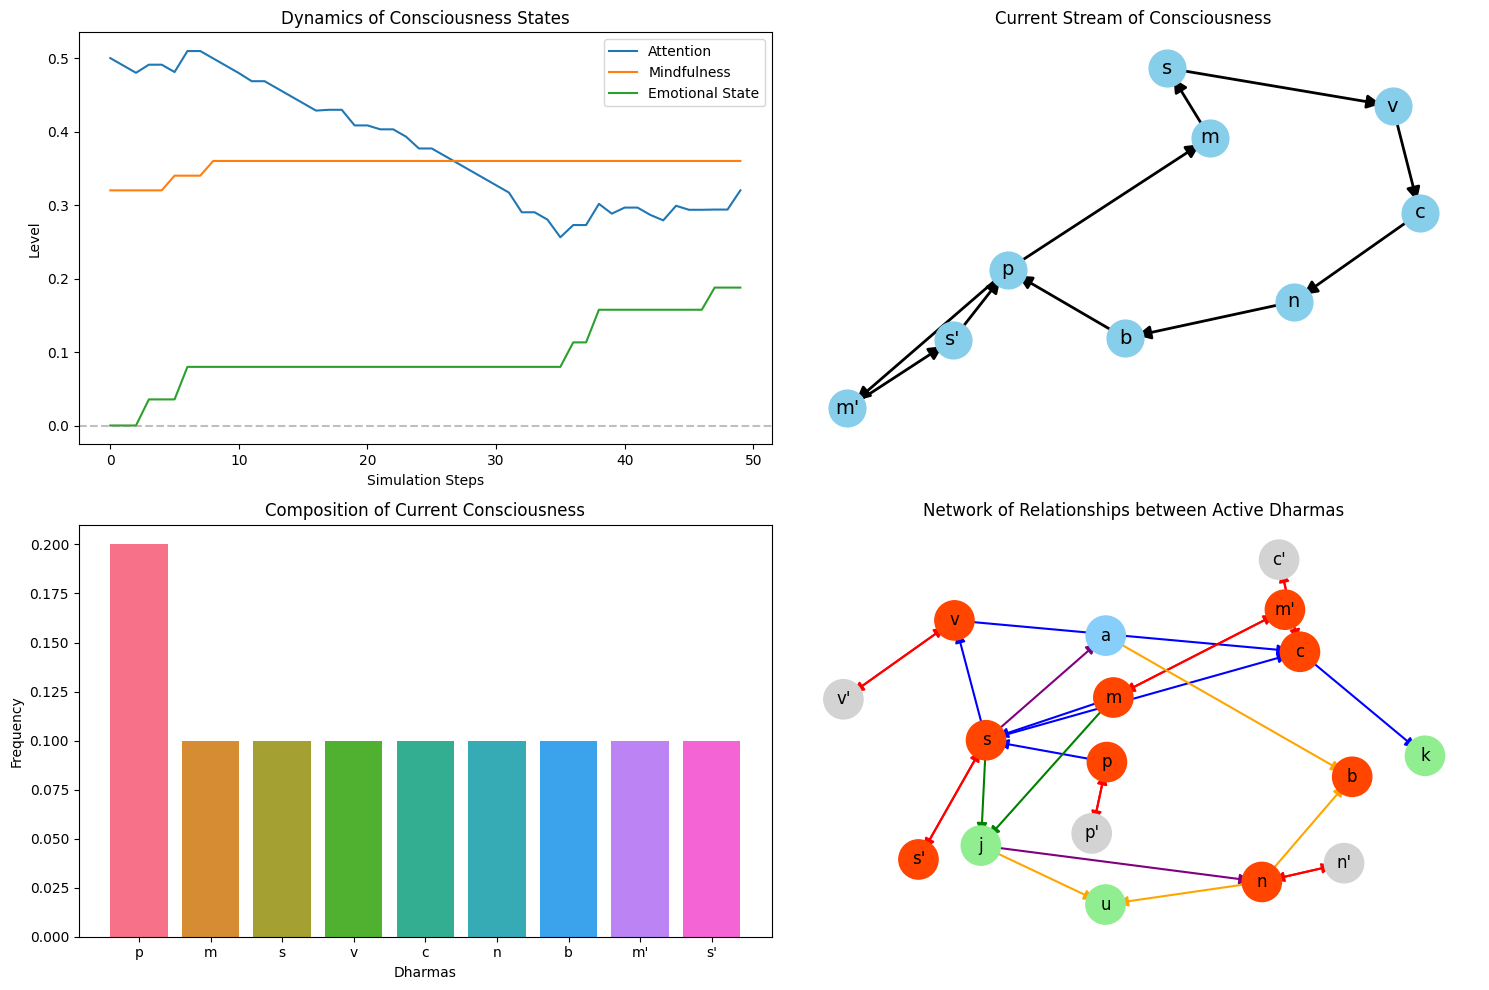

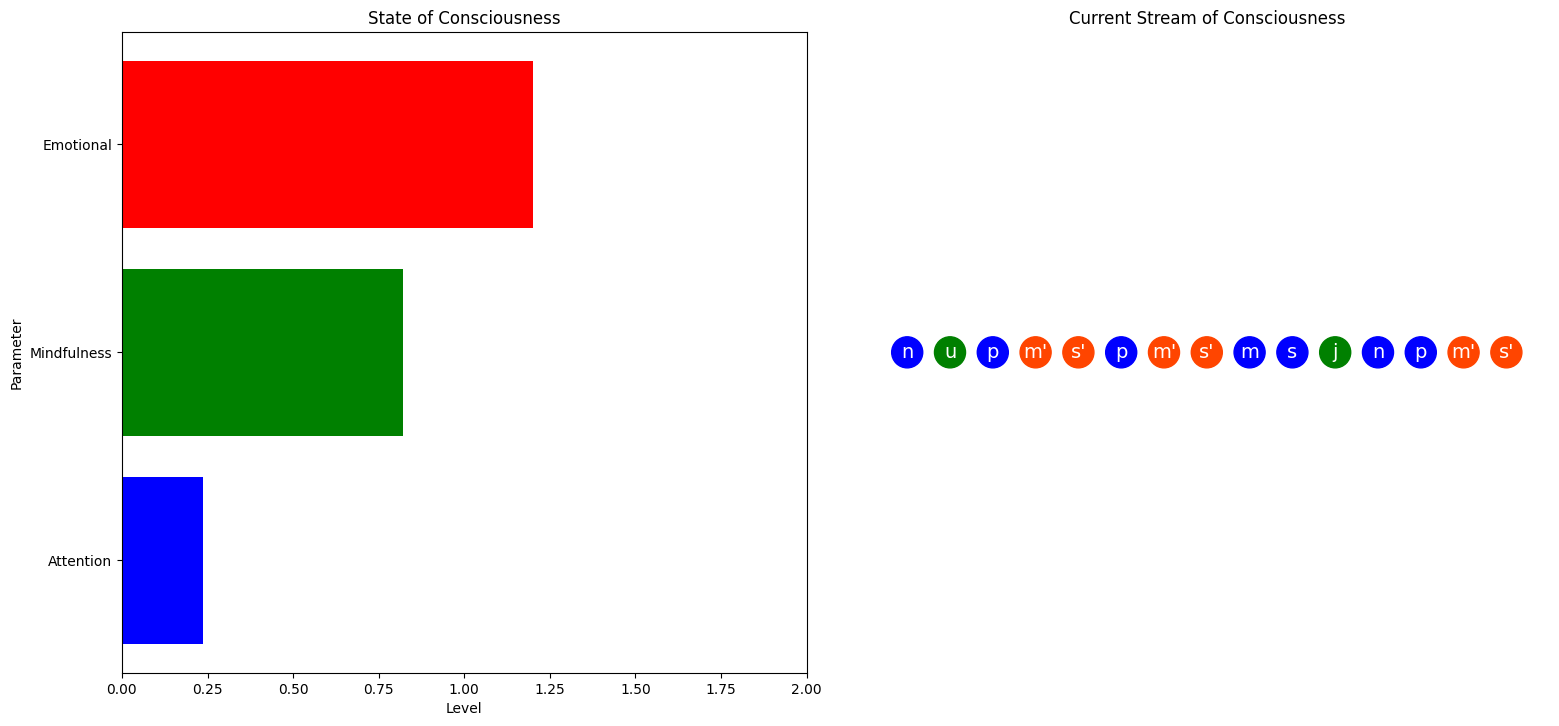

In [4]:
# Create a consciousness simulator
consciousness = ConsciousnessSimulator()

# Run the simulation for 50 steps
consciousness.run_simulation(steps=50, external_stimuli_prob=0.3)

# Create an animation of the stream of consciousness
animation = consciousness.animate_consciousness(steps=100, interval=300)
animation